# Examen de certificación – Intento 3


Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de deserción de clientes. Utilizaremos el «Customer Churn Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

## Contexto y Descripción del Dataset

El «Customer Churn Dataset» contiene datos de una compañía de telecomunicaciones que describen el comportamiento de los clientes y su tendencia a desertar (churn). La tarea es predecir si un cliente abandonará la compañía basándose en varias características demográficas y de uso del servicio.

El «Customer Churn Dataset» contiene datos de una compañía de telecomunicaciones que describen el comportamiento de los clientes y su tendencia a desertar (churn). La tarea es predecir si un cliente abandonará la compañía basándose en varias características demográficas y de uso del servicio.

## Diccionario de Datos:

1. customerID: Un identificador único para cada cliente.
2. gender: El género del cliente (Male/Female).
3. SeniorCitizen: Indica si el cliente es una persona mayor (1) o no (0).
4. Partner: Indica si el cliente tiene pareja (Yes/No).
5. Dependents: Indica si el cliente tiene dependientes (Yes/No).
6. tenure: Número de meses que el cliente ha estado con la compañía.
7. PhoneService: Indica si el cliente tiene servicio telefónico (Yes/No).
8. MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).
9. InternetService: Tipo de servicio de internet del cliente (DSL/Fiber optic/No).
10. OnlineSecurity: Indica si el cliente tiene seguridad en línea (Yes/No/No internet service).
11. OnlineBackup: Indica si el cliente tiene respaldo en línea (Yes/No/No internet service).
12. DeviceProtection: Indica si el cliente tiene protección de dispositivos (Yes/No/No internet service).
13. TechSupport: Indica si el cliente tiene soporte técnico (Yes/No/No internet service).
14. StreamingTV: Indica si el cliente tiene servicio de TV en streaming (Yes/No/No internet service).
15. StreamingMovies: Indica si el cliente tiene servicio de películas en streaming (Yes/No/No internet service).
16. Contract: Tipo de contrato del cliente (Month-to-month/One year/Two year).
17. PaperlessBilling: Indica si el cliente tiene facturación electrónica (Yes/No).
18. PaymentMethod: Método de pago del cliente (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
19. MonthlyCharges: Importe mensual que paga el cliente.
20. TotalCharges: Importe total pagado por el cliente.
21. Churn: Indica si el cliente ha abandonado la compañía (Yes/No).

## Requisitos

### 1.  Limpieza de Datos:


* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

### 2. Exploración de Datos:

* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

### 3. Implementación de Modelos:

* Modelos de Clasificación: Implementa modelos de SVM y XGBoost.
* Optimización de Modelos: Utiliza RandomizedSearchCV para optimizar los hiperparámetros de los modelos.
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


# Resolución

## Carga de datos

In [1]:
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/customer-churn-dataset" (use force=True to force download)


In [2]:
import pandas as pd

camino_ds = "../data/customer-churn-dataset/customer_churn_dataset-training-master.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Haciendo una lectura inicial, notamos que este dataset no coincide con las columnas especificadas en el planteamiento del ejercicio. Se realizará el análisis teniendo en cuenta las columnas mencionadas en la [descripción del dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset).

Notamos que existen 12 características y 440833 entradas en este dataset.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


## 1. Limpieza de Datos:

### Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

Primero, verificamos si no existen datos nulos a tener en cuenta.

In [4]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,1,0.0
Age,440832,1,0.0
Gender,440832,1,0.0
Tenure,440832,1,0.0
Usage Frequency,440832,1,0.0
Support Calls,440832,1,0.0
Payment Delay,440832,1,0.0
Subscription Type,440832,1,0.0
Contract Length,440832,1,0.0
Total Spend,440832,1,0.0


Parece ser que existe solamente 1 valor NA potencialmente para cada columna. Esto indica que posiblemente sea una fila vacía.

In [5]:
df[df.isnull().all(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos esta fila ya que es la única vacía.

In [6]:
# El parametro how="all" eliminará solamente las filas que estén completamente vacías.
df.dropna(how="all", inplace=True)

In [7]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage Frequency,440832,0,0.0
Support Calls,440832,0,0.0
Payment Delay,440832,0,0.0
Subscription Type,440832,0,0.0
Contract Length,440832,0,0.0
Total Spend,440832,0,0.0


Ya no existen la fila vacía. También, se puede notar que no existen datos nulos en este dataset fuera de la fila vacía.

Verificamos la columna CustomerID

In [8]:
unicos_customer_id = df["CustomerID"].unique().tolist()

if len(unicos_customer_id) != df.shape[0]:
    print("Existe más de un cliente único en el dataset")
else:
    print("Todos los clientes son únicos en el dataset")

Todos los clientes son únicos en el dataset


Verificamos si existen columnas booleanas.

In [9]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Gender': ['Female' 'Male']
Valores de columna 'Churn': [1. 0.]
La columna 'Churn' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Churn']


Se ha encontrado sólo una columna booleana (Churn). Notar además, que el código imprime todas las columnas que tienen solo 2 valores, para permitir ajustes en las listas de posibilidades en caso de que se requiera agregar otras opciones.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  bool   
dtypes: bool(1), float64(8), object(3)
memory usage: 40.8+ MB


Buscamos ahora las columnas categóricas.

In [11]:
columnas_potencialmente_categoricas = df.select_dtypes(include=["object", "string"]).columns.tolist()

columnas_potencialmente_categoricas

['Gender', 'Subscription Type', 'Contract Length']

Limpiamos estas columnas.

In [12]:
from utils.eda_utils import limpiar_cadena


for columna in columnas_potencialmente_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

Verificamos y convertimos si es necesario.

In [13]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_potencialmente_categoricas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_potencialmente_categoricas)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'Gender': 2
Valores únicos columna 'Gender': ['female', 'male']
Se procede a convertir la columna 'Gender' a categórica
Cant. únicos para columna 'Subscription Type': 3
Valores únicos columna 'Subscription Type': ['standard', 'basic', 'premium']
Se procede a convertir la columna 'Subscription Type' a categórica
Cant. únicos para columna 'Contract Length': 3
Valores únicos columna 'Contract Length': ['annual', 'monthly', 'quarterly']
Se procede a convertir la columna 'Contract Length' a categórica


Cant. de columnas analizadas: 3
Cant. de columnas convertidas a category: 3
Cant. de columnas convertidas a string: 0
Columnas convertidas a categóricas: ['Gender', 'Subscription Type', 'Contract Length']
Columnas convertidas a string: []


Se puede notar que todas las columnas potencialmente categóricas fueron convertidas. No se encontró ninguna columna de tipo cadena. Notar además, que el código se puede ajustar de acuerdo a lo que se imprime en caso de que se detecten irregularidades.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  float64 
 1   Age                440832 non-null  float64 
 2   Gender             440832 non-null  category
 3   Tenure             440832 non-null  float64 
 4   Usage Frequency    440832 non-null  float64 
 5   Support Calls      440832 non-null  float64 
 6   Payment Delay      440832 non-null  float64 
 7   Subscription Type  440832 non-null  category
 8   Contract Length    440832 non-null  category
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  float64 
 11  Churn              440832 non-null  bool    
dtypes: bool(1), category(3), float64(8)
memory usage: 32.0 MB


Verificamos ahora que las columnas que son flotantes sean realmente flotantes y no enteros.

In [15]:
columnas_flotantes = df.select_dtypes(include="float64")

columnas_convertidas_a_entero = []


def _convertir_a_entero(x):
    if not x.is_integer():
        raise ValueError(f"Valor {x} no es entero")
    return int(x)


for columna in columnas_flotantes:
    datos_columna = df[columna]

    try:
        datos_columna.apply(_convertir_a_entero)
        print(f"Columna '{columna}' es entera. Se procede a convertirla.")
        df[columna] = df[columna].astype("int64")
        columnas_convertidas_a_entero.append(columna)
    except Exception:
        print(f"Columna '{columna}' no es entera. Se mantiene como está.")


print("\n")
print(f"Columnas convertidas a entero: {str(columnas_convertidas_a_entero)}")

Columna 'CustomerID' es entera. Se procede a convertirla.
Columna 'Age' es entera. Se procede a convertirla.
Columna 'Tenure' es entera. Se procede a convertirla.
Columna 'Usage Frequency' es entera. Se procede a convertirla.
Columna 'Support Calls' es entera. Se procede a convertirla.
Columna 'Payment Delay' es entera. Se procede a convertirla.
Columna 'Total Spend' no es entera. Se mantiene como está.
Columna 'Last Interaction' es entera. Se procede a convertirla.


Columnas convertidas a entero: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Last Interaction']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  int64   
 1   Age                440832 non-null  int64   
 2   Gender             440832 non-null  category
 3   Tenure             440832 non-null  int64   
 4   Usage Frequency    440832 non-null  int64   
 5   Support Calls      440832 non-null  int64   
 6   Payment Delay      440832 non-null  int64   
 7   Subscription Type  440832 non-null  category
 8   Contract Length    440832 non-null  category
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  int64   
 11  Churn              440832 non-null  bool    
dtypes: bool(1), category(3), float64(1), int64(7)
memory usage: 32.0 MB


Al parecer, las columnas flotantes, con excepción de Total Spend, pueden ser interpretados como enteros, por lo cual estas columnas fueron convertidas.

### Corrección de inconsistencias en valores categóricos

In [17]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    valores_unicos = df[columna].unique().tolist()
    print(f"Únicos para columna '{columna}': {str(valores_unicos)}")

Únicos para columna 'Gender': ['female', 'male']
Únicos para columna 'Subscription Type': ['standard', 'basic', 'premium']
Únicos para columna 'Contract Length': ['annual', 'monthly', 'quarterly']


No existen valores que sean similares en los valores únicos de cada columna categórica, por lo que no es necesaria ninguna corrección.

### Corrección de inconsistencias en valores numéricos

In [18]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
CustomerID,440832.0,2.0,449999.0,225398.667955,129531.918550,226125.5,0.574679
Age,440832.0,18.0,65.0,39.373153,12.442369,39.0,0.316012
Tenure,440832.0,1.0,60.0,31.256336,17.255727,32.0,0.552071
Usage Frequency,440832.0,1.0,30.0,15.807494,8.586242,16.0,0.543175
Support Calls,440832.0,0.0,10.0,3.604437,3.070218,3.0,0.851789
Payment Delay,440832.0,0.0,30.0,12.965722,8.258063,12.0,0.636915
Total Spend,440832.0,100.0,1000.0,631.616223,240.803001,661.0,0.381249
Last Interaction,440832.0,1.0,30.0,14.480868,8.596208,14.0,0.593625


Como el dataset en kaggle no provee diccionario de datos, se asume lo siguiente:

- Tenure: cant. de meses con servicio activo
- Payment Delay: Cant. de meses de retraso en pago
- Last Interaction: Duración en minutos de última llamada.

Esto no se puede confirmar, pero como no existe una descripción que valide estas conclusiones, para este análisis se considera que son correctas.

### Manejo de valores faltantes adecuadamente

In [19]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage Frequency,440832,0,0.0
Support Calls,440832,0,0.0
Payment Delay,440832,0,0.0
Subscription Type,440832,0,0.0
Contract Length,440832,0,0.0
Total Spend,440832,0,0.0


No existen valores faltantes en este dataset. Existía una fila que tenía datos vacíos, pero esta fila fue eliminada en un paso previo.

### Identificación y eliminación de valores duplicados

In [20]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


No existen duplicados en general. Verificamos si se encuentran duplicados eliminando la columna CustomerID, ya que puede influír en el entrenamiento.

In [21]:
duplicados_sin_customer_id = df.drop("CustomerID", axis=1).duplicated()

cant_registros_duplicados_sin_customer_id = duplicados_sin_customer_id.sum()

print(f"Cant. de Registros Duplicados sin CustomerID: {cant_registros_duplicados_sin_customer_id}")

Cant. de Registros Duplicados sin CustomerID: 0


Tampoco existen duplicados sin CustomerID. Por este motivo, no es necesario eliminar ningún duplicado.

Finalmente, eliminamos la columna CustomerID, ya que no será útil al momento de entrenar modelos.

In [22]:
df.drop("CustomerID", axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Age                440832 non-null  int64   
 1   Gender             440832 non-null  category
 2   Tenure             440832 non-null  int64   
 3   Usage Frequency    440832 non-null  int64   
 4   Support Calls      440832 non-null  int64   
 5   Payment Delay      440832 non-null  int64   
 6   Subscription Type  440832 non-null  category
 7   Contract Length    440832 non-null  category
 8   Total Spend        440832 non-null  float64 
 9   Last Interaction   440832 non-null  int64   
 10  Churn              440832 non-null  bool    
dtypes: bool(1), category(3), float64(1), int64(6)
memory usage: 28.6 MB


## 2. Exploración de Datos

### Visualizaciones Univariadas y Multivariadas

#### Histogramas

In [24]:
from utils.eda_utils import obtener_columnas_numericas_df, graficar_histogramas


columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

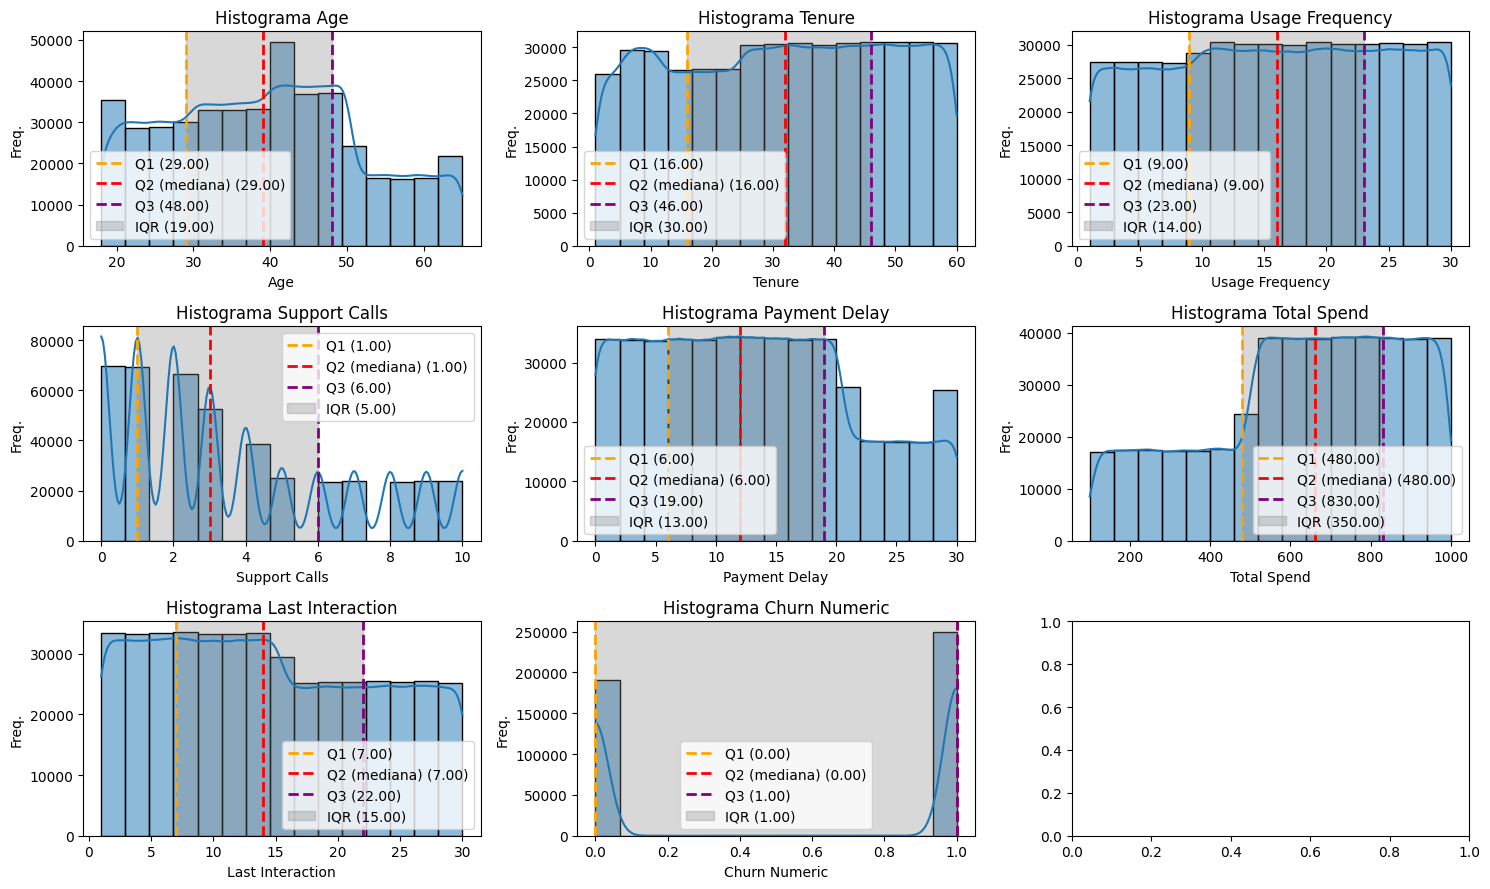

In [25]:
# Agregamos también outcome para visualizar la distribución.
df["Churn Numeric"] = df["Churn"].apply(lambda x: 1.0 if x else 0.0)
graficar_histogramas(df, columnas_numericas + ["Churn Numeric"], nro_columnas=3, kde=True, bins=15, figsize=(15, 9))

De los histogramas podemos destacar: 
- Ninguna columna posee una distribución normal.
- En el histograma de Churn, que hay un desbalanceo muy menor en el dataset.
- Exiten más clientes pérdidos que retenidos.

#### Boxplots

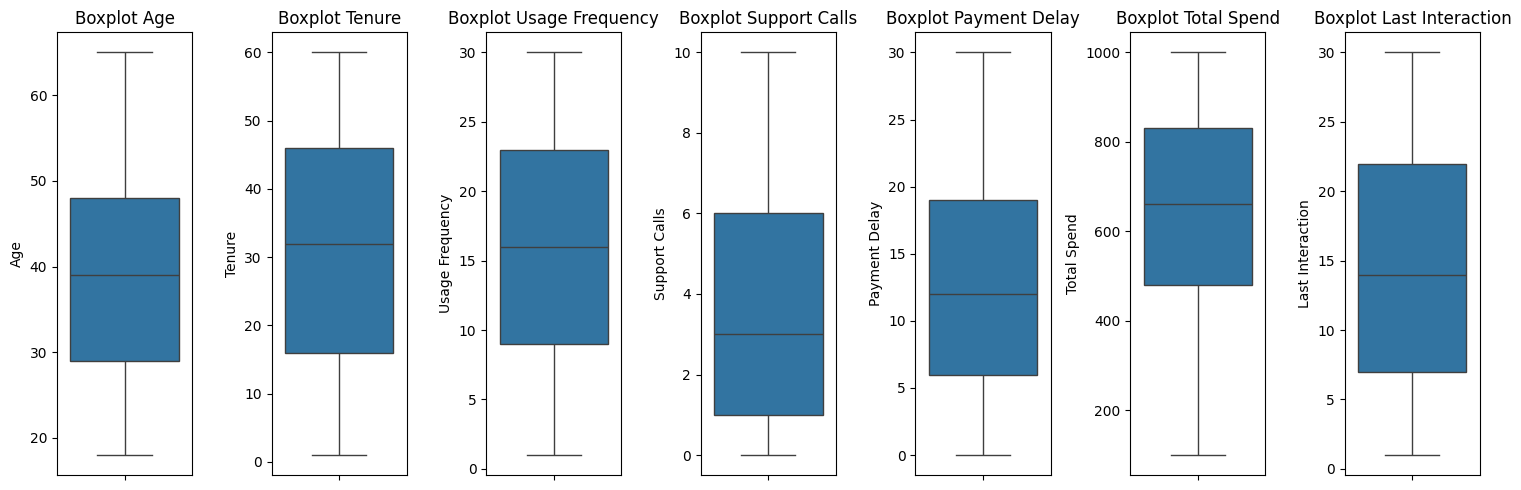

In [26]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=7, figsize=(15, 5))

De los boxplots podemos destacar:

- No se visualizan outliers en las columnas numéricas. Se verificará luego en las gráficas multivariadas si es el mismo caso con los boxplots con respecto a Churn.
- La mayoría de as columnas posee la mediana centrada, con la excepción de Support Calls. Esto indica que tal vez puedan usarse técnicas de escalamiento como StandardScaler o MinMaxScaler. Como los datos no parecen seguir una distribución estándar, posiblemente se opte por usar MinMaxScaler. La ausencia de outliers también indica que usar estas técnicas de escalamiento es viable.

#### Mapa de correlación

                       Age    Tenure  Usage Frequency  Support Calls  \
Age               1.000000 -0.011630        -0.007190       0.158451   
Tenure           -0.011630  1.000000        -0.026800      -0.027640   
Usage Frequency  -0.007190 -0.026800         1.000000      -0.022013   
Support Calls     0.158451 -0.027640        -0.022013       1.000000   
Payment Delay     0.061738 -0.016588        -0.014470       0.162889   
Total Spend      -0.084684  0.019006         0.018631      -0.221594   
Last Interaction  0.028980 -0.006903        -0.004662       0.077684   
Churn Numeric     0.218394 -0.051919        -0.046101       0.574267   

                  Payment Delay  Total Spend  Last Interaction  Churn Numeric  
Age                    0.061738    -0.084684          0.028980       0.218394  
Tenure                -0.016588     0.019006         -0.006903      -0.051919  
Usage Frequency       -0.014470     0.018631         -0.004662      -0.046101  
Support Calls          0.162889

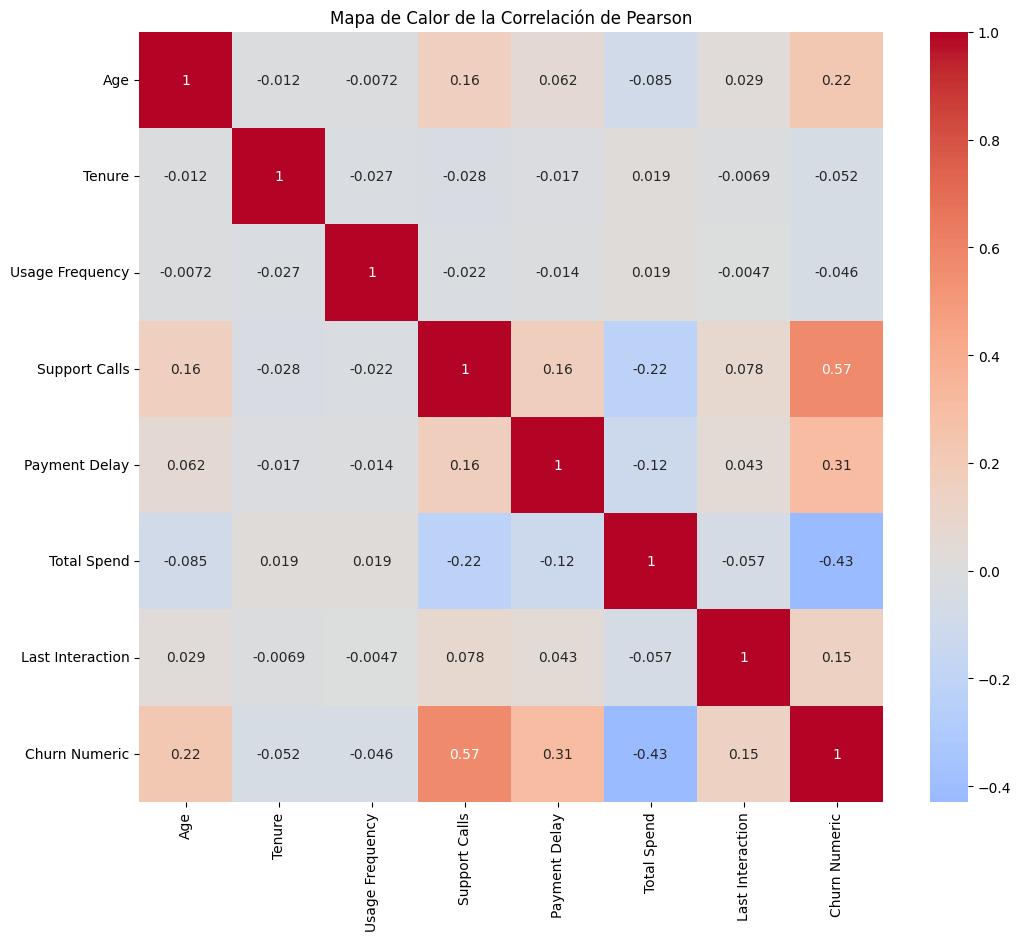

In [27]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas + ["Churn Numeric"], figsize=(12, 10))

In [28]:
df.drop("Churn Numeric", axis=1, inplace=True)

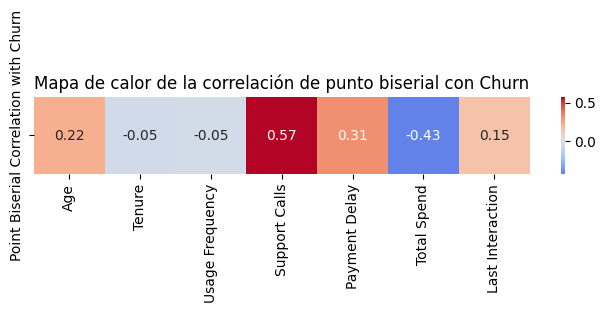

In [29]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
corr = {col: pointbiserialr(df['Churn'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with Churn'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Churn')
plt.show()

De los mapas de correlaciones tanto numéricas como biserial. Podemos notar las mismas correlacciones con las demás columnas.

Las correlaciones encontradas, de mayor a menor, son:

- Support Calls
- Total Spend
- Payment Delay
- Age
- Last interaction

#### Boxplots multivariados

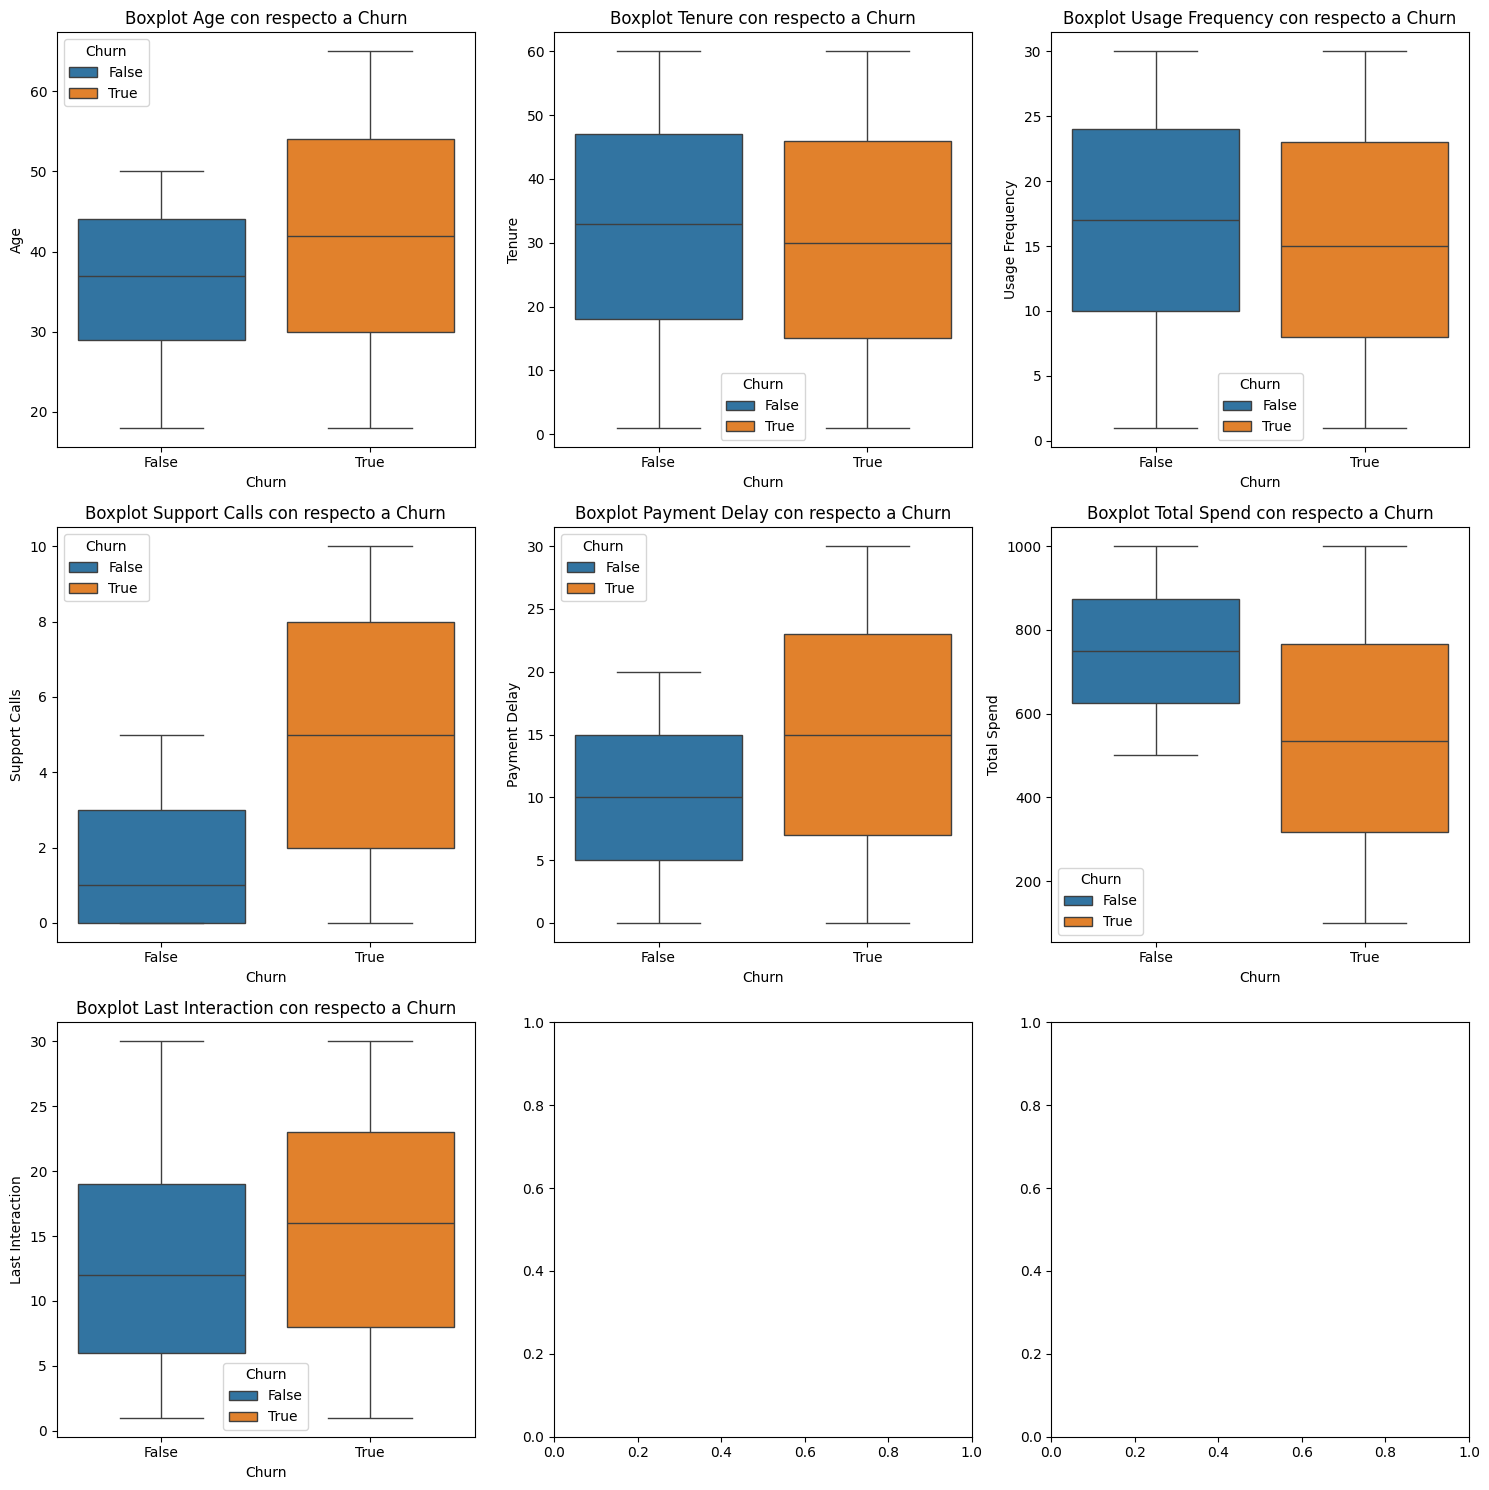

In [30]:
from utils.eda_utils import graficar_boxplots_respecto_a_columna


graficar_boxplots_respecto_a_columna(df, columnas_numericas, "Churn", nro_columnas=3, figsize=(15, 15))

De estos boxplots con respecto a Churn podemos destacar:

- No se detectan outliers respecto a la columna churn
- Las columnas en las que encontramos una diferencia de distribución: Age, Support Calls, Payment Delay, Total Spend. Estas columnas probablemente afecten en mayor medida la retención o fuga de clientes.

#### Gráficos de Dispersión

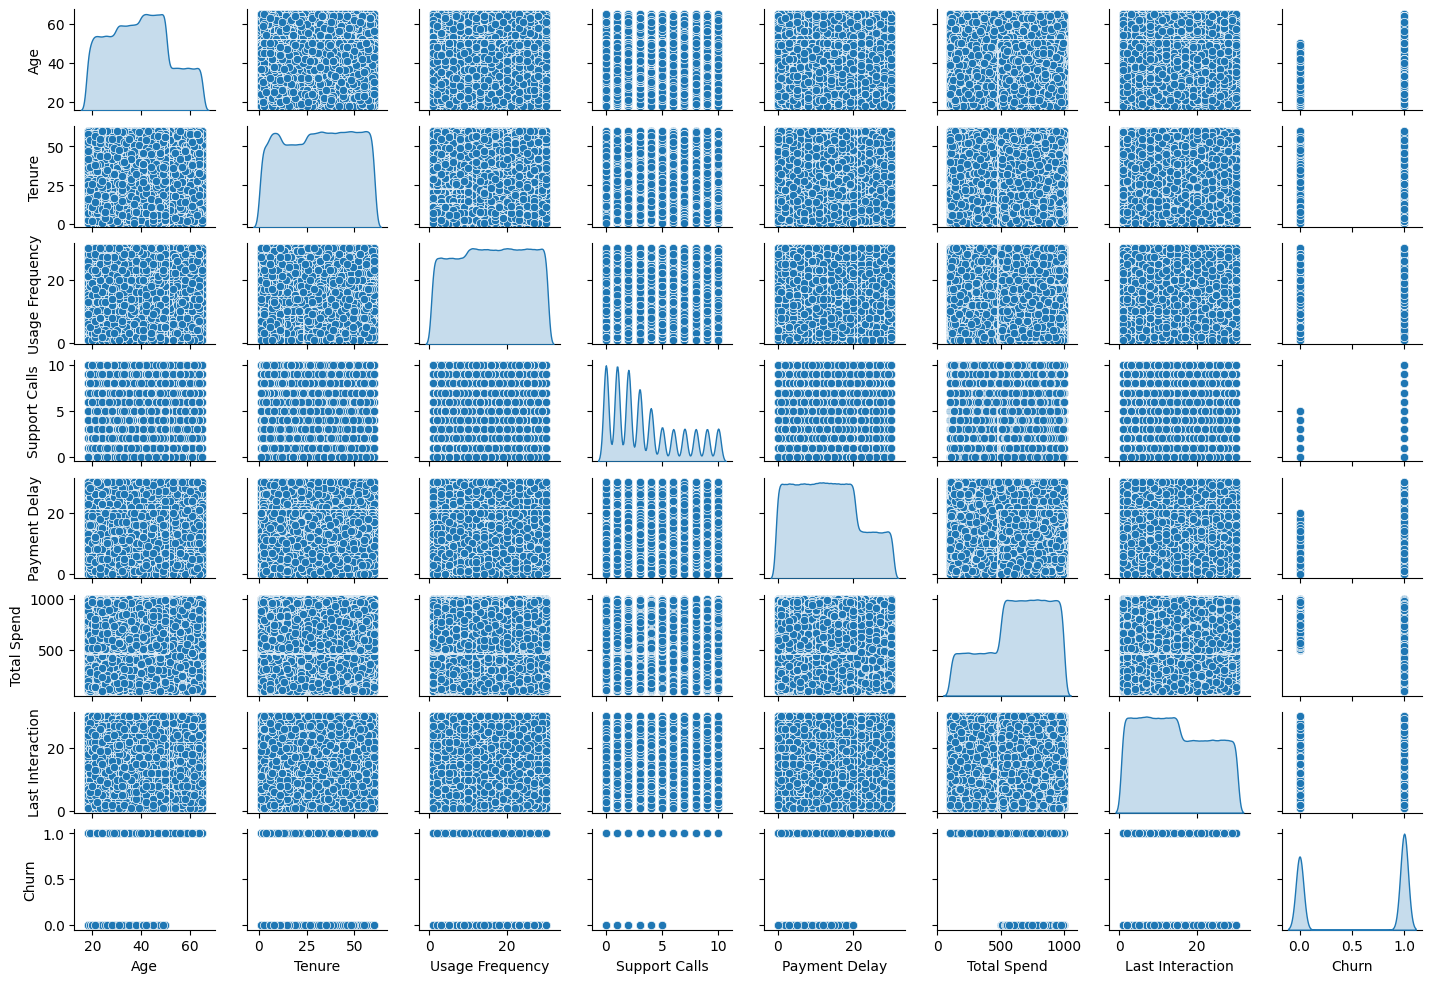

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Spectral")
g = sns.pairplot(df[[*columnas_numericas] + ["Churn"]], height=1.2, diag_kind = 'kde')
g.figure.set_size_inches(15, 10)
plt.show()

De los gráficos de dispersión, podemos notar que no existe una relación muy fuerte en ninguna de las variables.

#### Gráficos de Barra

/home/diego/Documentos/Programacion/mitic-bootcamp/coding-dojo-ds-ml-bootcamp/machine_learning/examenes/examen_certificacion_intento_3_customer_churn/notebooks/utils/eda_utils.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/home/diego/Documentos/Programacion/mitic-bootcamp/coding-dojo-ds-ml-bootcamp/machine_learning/examenes/examen_certificacion_intento_3_customer_churn/notebooks/utils/eda_utils.py:328: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/home/diego/Documentos/Programacion/mitic-bootcamp/coding-dojo-ds-ml-bootcamp/machine_

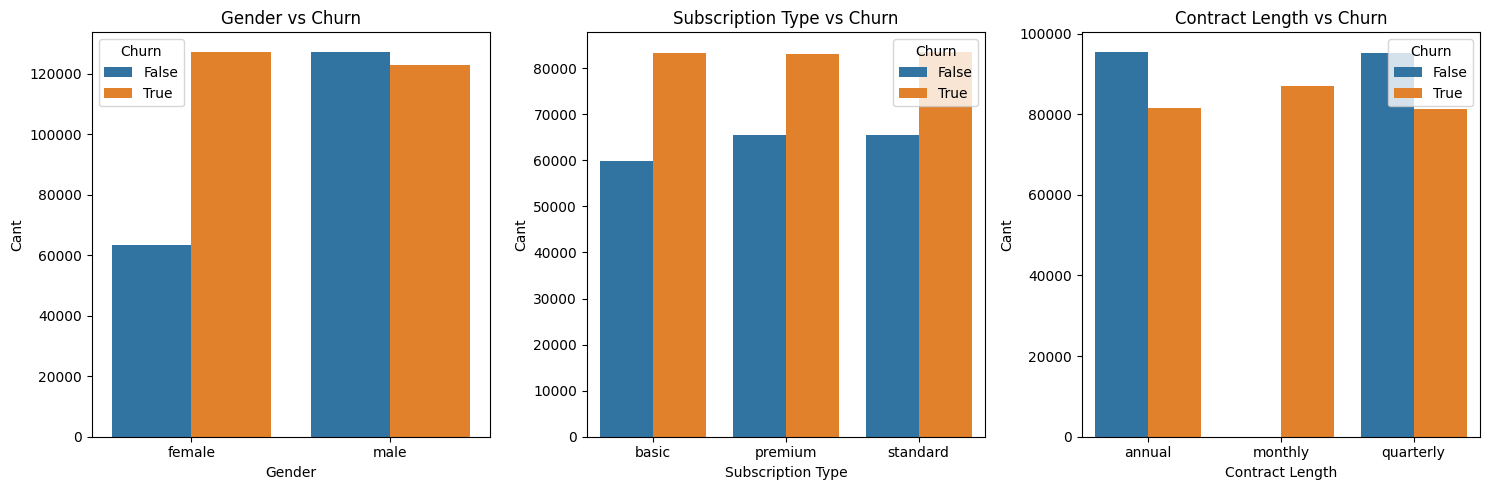

In [34]:
from utils.eda_utils import graficar_barras_conteo_contra_columna


columnas_categoricas = obtener_columnas_categoricas_df(df)


graficar_barras_conteo_contra_columna(df, columnas_categoricas + [], "Churn", nro_columnas=3, figsize=(15, 5))


De los gráficos de barras podemos notar:

- En el caso de género, no hay diferencia en las cantidades de clientes perdidos, no obstante, en los retenidos podemos notar que hay una menor cant. de mujeres.
- En el caso de tipo de subscripción, las cantidades tanto en clientes retenidos como perdidos son bastante similares, por lo que no hay mucho efecto.
- En el caso de la duración del contrato, si podemos notar que no hay practicamente clientes retenidos en la modalidad de contrato mensual. Por lo cual, este puede ser un factor importante a la hora de la predicción.

### Estadísticas Descriptivas

In [35]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Age,440832.0,18.0,65.0,39.373153,12.442369,39.0,0.316012
Tenure,440832.0,1.0,60.0,31.256336,17.255727,32.0,0.552071
Usage Frequency,440832.0,1.0,30.0,15.807494,8.586242,16.0,0.543175
Support Calls,440832.0,0.0,10.0,3.604437,3.070218,3.0,0.851789
Payment Delay,440832.0,0.0,30.0,12.965722,8.258063,12.0,0.636915
Total Spend,440832.0,100.0,1000.0,631.616223,240.803001,661.0,0.381249
Last Interaction,440832.0,1.0,30.0,14.480868,8.596208,14.0,0.593625


De las estadísticas descriptivas podemos notar:

- En ningún caso el promedio es representativo, ya que el coeficiente de variación es mayor al 30%.

#### Outliers

In [36]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,0.0,0.0,0.5,76.5
Tenure,0.0,0.0,-29.0,91.0
Usage Frequency,0.0,0.0,-12.0,44.0
Support Calls,0.0,0.0,-6.5,13.5
Payment Delay,0.0,0.0,-13.5,38.5
Total Spend,0.0,0.0,-45.0,1355.0
Last Interaction,0.0,0.0,-15.5,44.5


No se pueden encontrar outliers en este dataset.

#### Moda

In [37]:
df.mode().T

,0
Age,50
Gender,male
Tenure,32
Usage Frequency,11
Support Calls,0
Payment Delay,12
Subscription Type,standard
Contract Length,annual
Total Spend,234.0
Last Interaction,7


Podemos encontrar aquí las modas de todas las columnas. Este dato podría ser utilizado para llenar columnas categóricas, pero como no existen en este dataset, no es necesario usar estas modas.